# metadynamics

## is the change in wall rare events?
### U over R

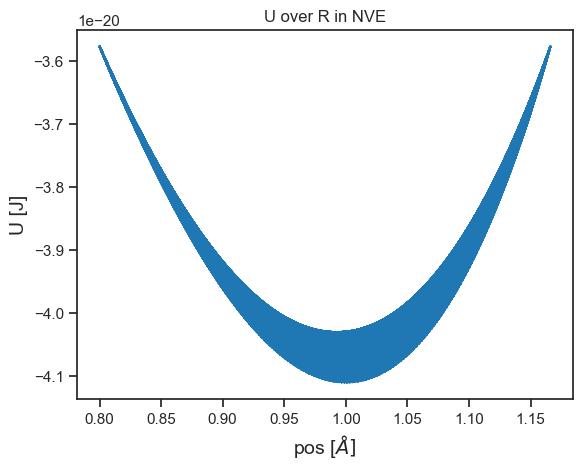

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simFor2Well.log", sep='\s+')

xyz = open("SimFor2Well.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    if(count % 3 != 2):
        pass
    else:
        line = i.split()
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

plt.title("U over R in NVE")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

### in const temp

768000


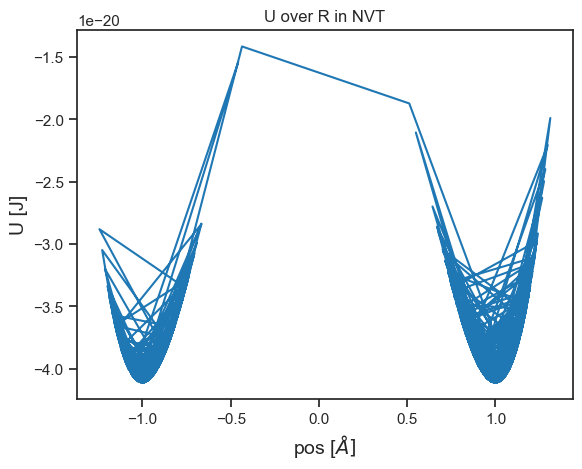

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simFor2Well_NVT.log", sep='\s+')

xyz = open("SimFor2Well_NVT.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

768000


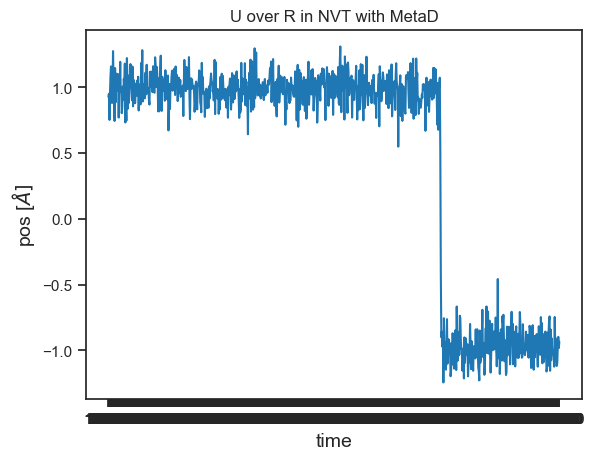

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimFor2Well_NVT.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel("time")
plt.ylabel(r"pos [$\AA ]$")
plt.plot(time, posX)

# with MetaD

768000


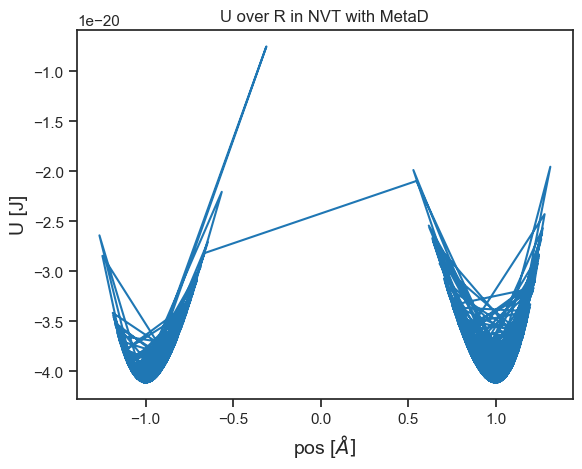

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForMetaD.log", sep='\s+')

xyz = open("SimForMetaD.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel(r"pos [$\AA ]$")
plt.ylabel("U [J]")
plt.plot(posX, df['U'])

768000


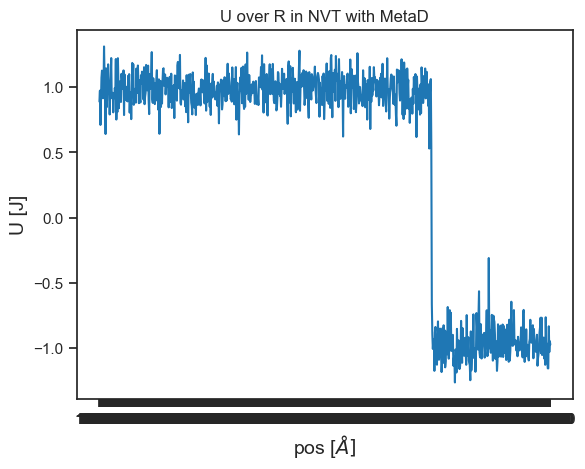

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForMetaD.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    line = i.split()
    if(count % 3 == 1):
        time.append(line[1])
    elif(count % 3 == 2):
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

for i in range(1, len(posX)):
    if(posX[i -1] * posX[i] < 0):
        print(time[i])

plt.title("U over R in NVT with MetaD")
plt.xlabel("time")
plt.ylabel(r"pos [$\AA ]$")
plt.plot(time, posX)